31


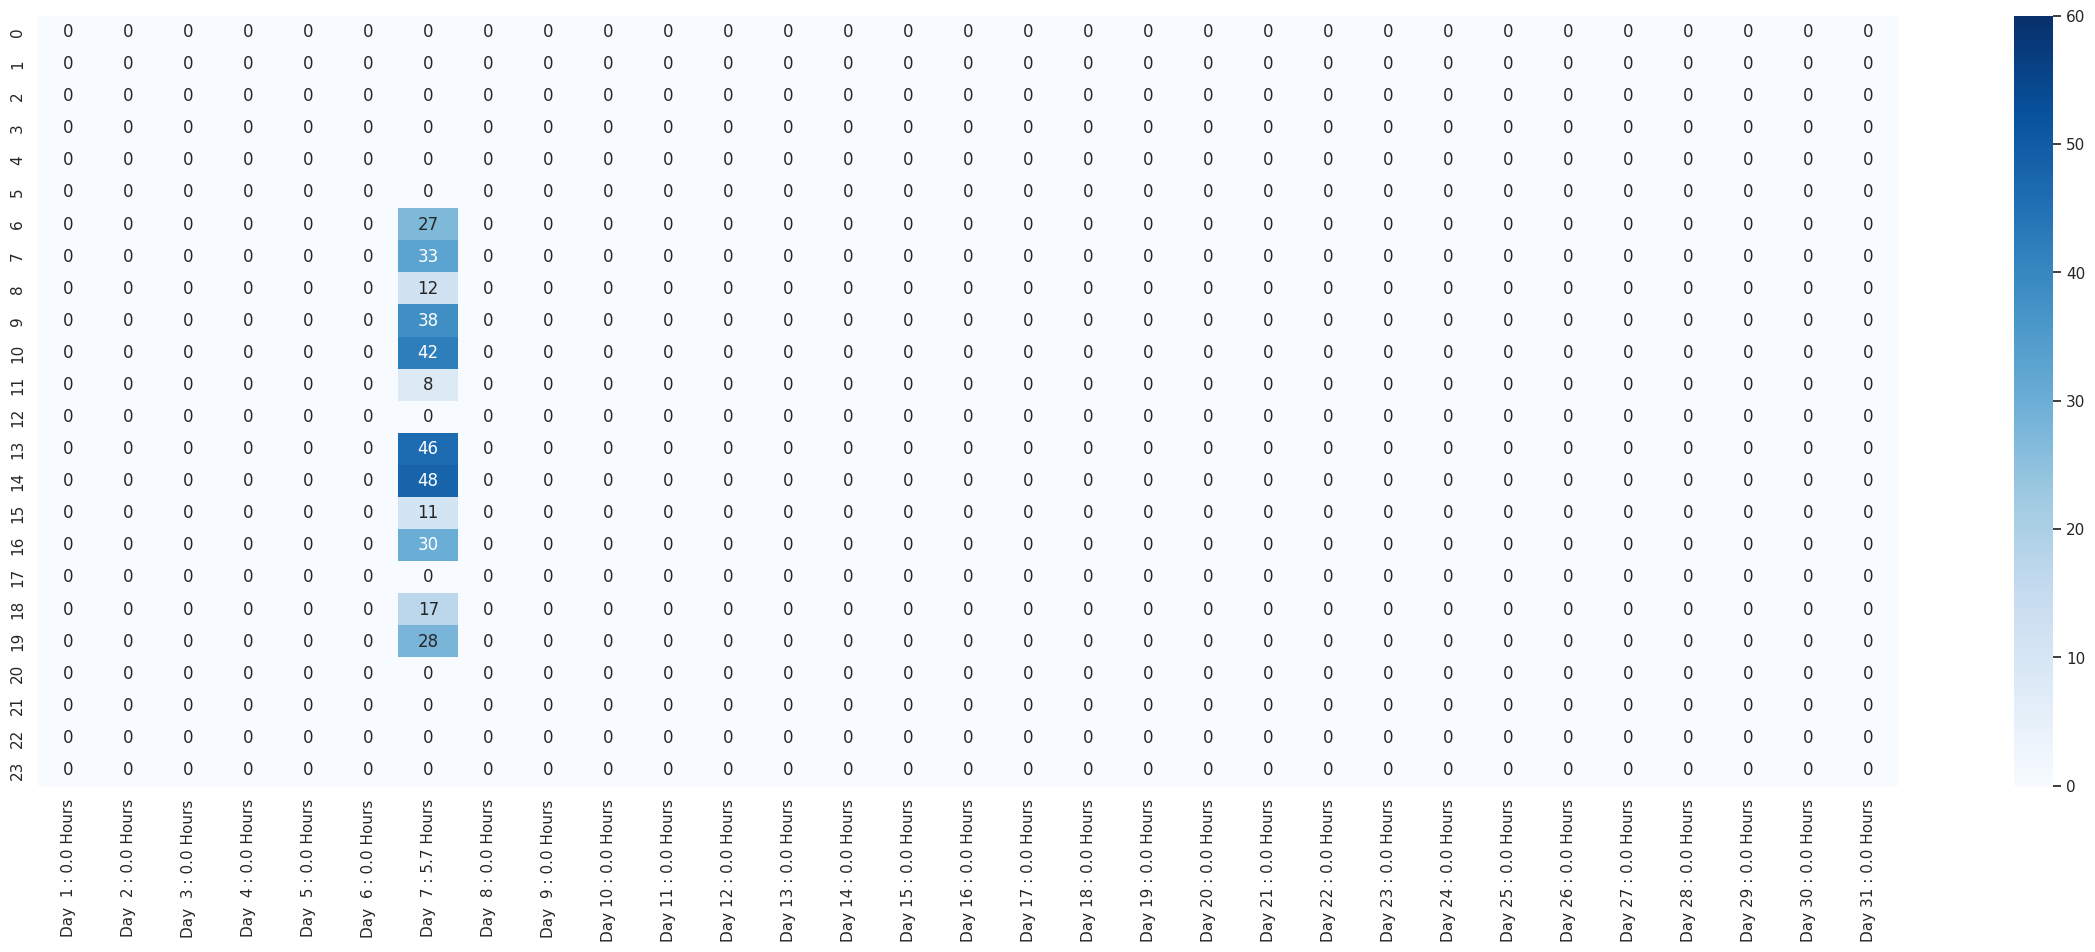

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

july_7_2023_data = {
    "date": "2023-07-07",
    "study": [
        {
            "start":"7:33",
            "end":"8:33"
        },
        {
            "start":"9:48",
            "end":"10:38"
        },
        {
            "start":"11:01",
            "end":"11:43"
        },
        {
            "start":"12:01",
            "end":"12:09"
        },
        {
            "start":"14:10",
            "end":"14:56"
        },
        {
            "start":"15:12",
            "end":"16:34"
        },
        {
            "start":"16:49",
            "end":"17:30"
        },
        {
            "start":"19:43",
            "end":"20:28"
        }
    ]
}

july_raw_data = [
    [], #1
    [], #2
    [], #3
    [], #4
    [], #5
    [], #6
    [july_7_2023_data], #7
    [], #8
    [], #9
    [], #10
    [], #11
    [], #12
    [], #13
    [], #14
    [], #15
    [], #16
    [], #17
    [], #18
    [], #19
    [], #20
    [], #21
    [], #22
    [], #23
    [], #24
    [], #25
    [], #26
    [], #27
    [], #28
    [], #29
    [], #30
    [] #31
]

july_data=np.zeros((31,24),np.int8)
for idx, day in enumerate(july_raw_data):
    if len(day) != 0:
        for time in day[0]["study"]:
            start_time=dt.datetime.strptime(time["start"], "%H:%M")
            end_time=dt.datetime.strptime(time["end"],"%H:%M")
            duration = end_time - start_time
            total_minutes = int(duration.total_seconds() / 60)
            for hour in range(start_time.hour, end_time.hour+1):
                if hour < end_time.hour:
                    mid_time = dt.datetime(start_time.year, start_time.month, start_time.day, hour+1,0,0)
                else:
                    mid_time = end_time
                duration = mid_time - start_time
                total_minutes = int(duration.total_seconds() / 60)
                july_data[idx][hour-1] = total_minutes

                if mid_time.hour < (end_time.hour +1):
                    start_time = mid_time
                 
        
# init the plot    
fig, ax = plt.subplots(figsize=(30,10))
sns.set()

# prepare the data
july_data_invert = np.swapaxes(july_data,0,1)

# generate x and y axis
xlabels = []
for day in range(0, july_data.shape[0]):
    xlabels.append("Day {:>2} : {:.1f} Hours".format(day+1, july_data[day].sum() / 60));

ax = sns.heatmap(july_data_invert, annot=True, vmin=0, vmax=60, xticklabels=xlabels, cmap=sns.color_palette("Blues", as_cmap=True))
plt.show()